# **ICE: Understanding Variable \& Data Types**
## Name: Cabot Steward
## *DATA 3300*

In this demonstration, we will review our different types of variables, as well as the different data types in Python! In this exercise we will:

1.   Define basic variable types
2.   Examine Data types in python, string, integer, float, nans
3.   Read in the dataset - ID primary key
4.   View & explore nominal vars
5.   View & explore ordinal vars, how could we create an ordinal variable from a continuous variable?
6. Identify and visualize interval variable (what are the bounds? -- is the zero meaningful)
7. Identify and visualize ratio variable (what are the bounds? is the zero meaningful?)
8. Create a discrete variable
9. View and visualize the discrete and the continuous variable
10. Adding new data & a similarity analysis!

### Business Scenario: University Student Performance and Well-being Analysis

> **Scenario Overview**:

> A university is conducting a comprehensive study to understand the factors influencing student performance and well-being. The goal is to identify key variables that impact academic success and personal satisfaction, allowing the university to implement targeted interventions to improve student outcomes. One intervention they're considering is called "Study Buddy" to ensure all students have at least one peer they can turn to to study with! Using the data provided, they are hoping to begin understanding what variables are important for matching student pairs.

This study uses a dataset collected from a diverse group of students, capturing a wide range of information, from academic performance to personal habits and attitudes.

> **Dataset Description:**

> The dataset contains 235 entries with 21 variables, including demographic information, academic performance metrics, personal habits, and subjective ratings on various aspects of student life. The key variables include:

* StudentID: Unique identifier for each student.
* Certification Course: The course the student is enrolled in.
* Gender: Gender of the student.
* Department: Academic department of the student.
* Weight(LBs): Weight of the student in pounds.
* Height(in): Height of the student in inches.
* 11.0th GPA: GPA in the 11th grade.
* 12th GPA: GPA in the 12th grade.
* College GPA: GPA in college.
* Hobbies: Student's hobbies.
* Daily Studying Time: Time spent studying daily.
* Prefer to Study In: Preferred time of day for studying.
* Salary Expectation: Expected salary after graduation.
* Do you like your degree?: Whether the student likes their degree.
* Willingness to Pursue a Career Based on Their Degree: Willingness to pursue a career related to their degree.
* Social Media & Video Usage: Time spent on social media and watching videos daily.
* Traveling Time: Time spent traveling daily.
* Stress Level: Self-reported stress level.
* Financial Status: Self-reported financial status.
* Part-time Job: Whether the student has a part-time job.

> **Objective:**

> The primary objective is to explore the dataset to understand the variable types and data types in Python, investigating how different variables relate to student performance and well-being. By analyzing the relationships between these variables, the university aims to better understand what variables could matter in student matching.

## Import Dependencies

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity


## Load the Dataset
We'll start by loading the dataset and taking a preliminary look at its structure.


In [26]:
df = pd.read_csv('1.1_DATASET_Student_Attitudes_Behaviors-1.csv')

# view dataset heading
df.head()

,StudentID,Certification Course,Gender,Department,Weight(LBs),Height(in),11.0th GPA,12th GPA,College GPA,hobbies,...,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree,social media & video,Travelling Time,Stress Level,Financial Status,part-time job
0,0,No,Male,BCA,127.86796,39.370100,3.7,2.7,4.0,Video Games,...,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,1,No,Female,BCA,88.18480,35.433090,3.3,4.0,3.3,Cinema,...,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,2,Yes,Male,BCA,171.96036,62.598459,3.3,2.7,2.3,Other,...,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,3,Yes,Female,BCA,44.09240,57.874047,3.3,2.3,2.3,Reading books,...,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,4,No,Male,BCA,119.04948,66.929170,1.0,3.0,1.0,Video Games,...,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


**What is our primary key, and what is the function of the primary key in a dataset?**

studentID is our primary key, the function is to provide a unique identifier for every record.

## Part A) Exploring Data Types in Python

In [27]:
# pull up data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 21 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   StudentID                                               235 non-null    int64  
 1   Certification Course                                    235 non-null    object 
 2   Gender                                                  235 non-null    object 
 3   Department                                              235 non-null    object 
 4   Weight(LBs)                                             235 non-null    float64
 5   Height(in)                                              235 non-null    float64
 6   11.0th GPA                                              235 non-null    float64
 7   12th GPA                                                235 non-null    float64
 8   College GPA                             

**1) Based on the variables listed, what do you think each of these three data types are?**
* object: string
* float64: number with decimals probably discrete
* int64: integer aka whole number probably continuous


**2) Why is it important we know the data type of a variable in Python?**

Python needs to know what each data type is inorder to be able to store it properly, enforce quality and do computation or string manipulation on the object.

In [28]:
# divide two float variables
df['11.0th GPA'] / df['12th GPA']
# ans = 10.5 / 11.2

# print(ans)
# # yes we have encountered a floating-point error we can fix that below
# from decimal import Decimal
# dec = Decimal('10.5') / Decimal('11.2')
# print(dec)

# this website will explain this concept. https://0.30000000000000004.com/


0      1.370370
1      0.825000
2      1.222222
3      1.434783
4      0.333333
         ...   
230    1.100000
231    1.000000
232    1.081081
233    1.212121
234    1.000000
Length: 235, dtype: float64

In [29]:
# divide two object variables
# df['Stress Level '] / df['Financial Status']


**3) This operation didn't work, why?**

You can't divide a str by str even if the numbers within it are a string

In [30]:
# add two string variables
df['hobbies'] + ': ' + df['If Other, Please Specify']

0                             NaN
1                             NaN
2      Other: Painting, art stuff
3                             NaN
4                             NaN
                  ...            
230                           NaN
231                           NaN
232                           NaN
233                           NaN
234                           NaN
Length: 235, dtype: object

**4) What does a NaN represent?**

Not a number, commonly encountered by the following:

1) dividing by zero
2) taking the square root of a negative number 
3) pandas often uses NaN to represents nulls when you generate a dataframe.


# Part B) Variable Types in Data Analysis

So far we have identified how python is treating our variables, but that doesn't completely align with how we want our variables to be treated.

Let's now examine the different levels of measurement we have in our dataset.


**1) What types of variables are considered qualitative (categorical)? What are some examples in the dataset of these types?**

Gender, Department, Hobbies, Stress level, financial status

* nominal: gender, department, hobbies, ....
* dichotomous: certification cert, ....
* ordinal: daily study time, ...

In [31]:
# view value_counts of the variable social media & video
df['social media & video'].value_counts()

social media & video
30 - 60 Minute      69
1 - 1.30 hour       55
1 - 30 Minute       47
More than 2 hour    32
1.30 - 2 hour       27
0 Minute             5
Name: count, dtype: int64

<Axes: >

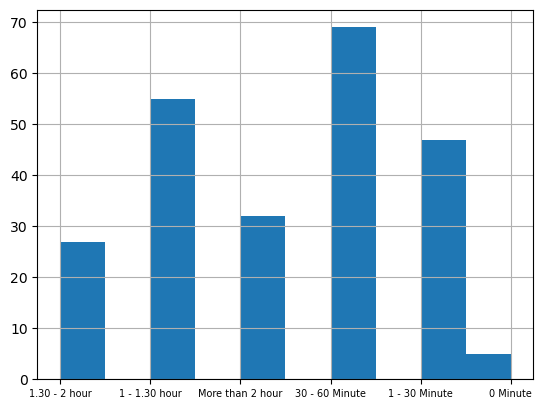

In [32]:
# produce hist of ordinal variable (social media & video)
df['social media & video'].hist(xlabelsize=7)

<Axes: >

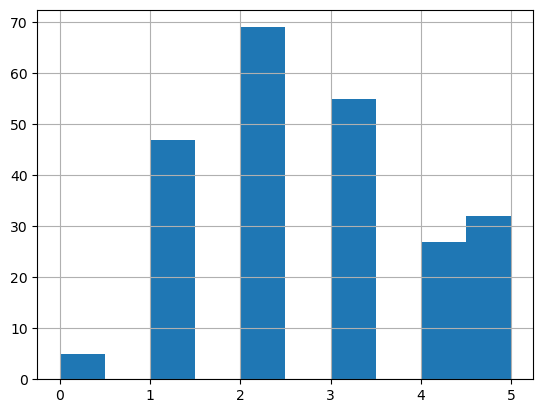

In [33]:
# map oridnal var to numeric values
df['social media & video'] = df['social media & video'].map({
    '0 Minute': 0,
    '1 - 30 Minute': 1,
    '30 - 60 Minute': 2,
    '1 - 1.30 hour': 3,
    '1.30 - 2 hour': 4,
    'More than 2 hour': 5
})

# replot histogram
df['social media & video'].hist()

**2) What types are variables are considered quantitative (Numerical)? What are some examples in the dataset?**

* ratio: have a meaningful zero - weight and height
* interval: does not have a meaningful zero - gpa

In [34]:
# pull up descriptive statistics for interval var
df['12th GPA'].describe()

count    235.000000
mean       3.104255
std        0.703519
min        1.000000
25%        2.700000
50%        3.000000
75%        3.700000
max        4.000000
Name: 12th GPA, dtype: float64

<Axes: >

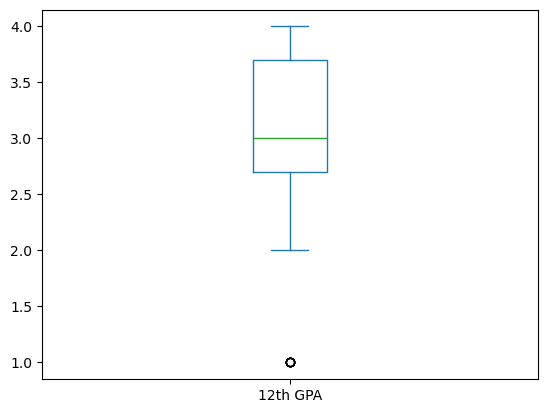

In [35]:
# make boxplot of interval var
df['12th GPA'].plot(kind='box')

In [36]:
# pull up descriptive stats of ratio var
#SKIPPED

In [37]:
# make boxplot of ratio var
#SKIPPED

**3) What is the difference between a continuous and discrete variable, are there examples of each in the dataset?**

* discrete - a whole numbers - salary expectations - ints
* continous - a number that can be a decimal - weight/height - floats

In [38]:
# create a new variable, total absences and fill with random values between 0-6
df['total_absences'] = np.random.randint(0, 7, size=len(df))

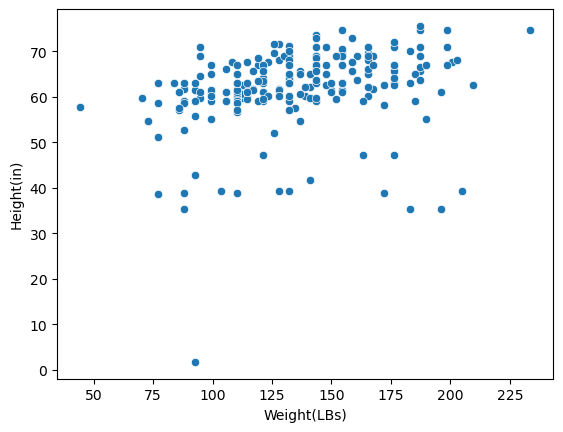

<Axes: xlabel='Weight(LBs)', ylabel='Height(in)'>

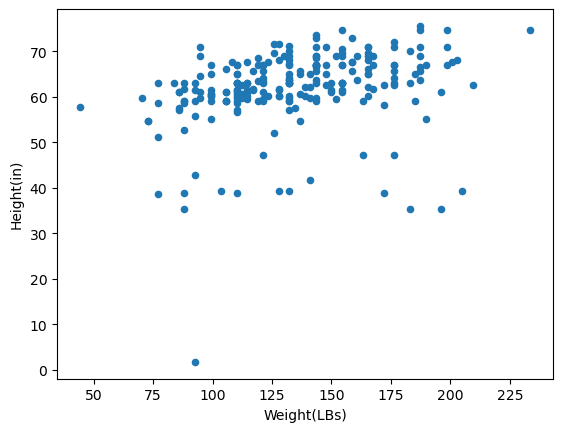

In [39]:
# create a scatterplot of two continuous vars
sns.scatterplot(x = df['Weight(LBs)'], y = df['Height(in)'])
plt.show()

# could just use pandas instead of bringing in another library, they both use matplotlib to graph in the background
df.plot(x='Weight(LBs)', y='Height(in)', kind='scatter')

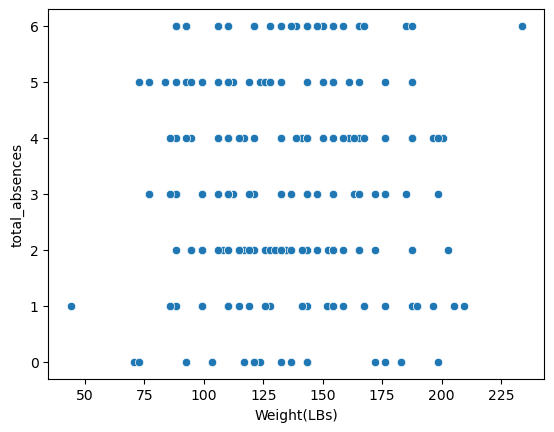

In [40]:
# create a scatterplot of a continous and discrete var

sns.scatterplot(x = df['Weight(LBs)'], y = df['total_absences'])
plt.show()

**4) How do you fit in with these other students? Take 5 minutes and work with a partner to add in your own data -- remember to keep the variable type in mind when adding new data!**

In [41]:
# view all columns in df
# df.head()
# df['Stress Level '].value_counts()
# df.value_counts()
# df['Travelling Time ']
# df['Stress Level ', 'Certification Course']
numerical_cols = ['Weight(LBs)', 'Height(in)', '11.0th GPA', '12th GPA', 'College GPA', 'daily studing time', 'salary expectation', 'social media & video']
df[numerical_cols]

,Weight(LBs),Height(in),11.0th GPA,12th GPA,College GPA,daily studing time,salary expectation,social media & video
0,127.86796,39.370100,3.7,2.7,4.0,0 - 30 minute,40000,4
1,88.18480,35.433090,3.3,4.0,3.3,30 - 60 minute,15000,3
2,171.96036,62.598459,3.3,2.7,2.3,1 - 2 Hour,13000,5
3,44.09240,57.874047,3.3,2.3,2.3,1 - 2 Hour,1500000,4
4,119.04948,66.929170,1.0,3.0,1.0,30 - 60 minute,50000,4
...,...,...,...,...,...,...,...,...
230,167.55112,66.929170,3.3,3.0,3.0,30 - 60 minute,7000,5
231,114.64024,67.716572,3.3,3.3,3.7,2 - 3 hour,25000,2
232,72.75246,54.724439,4.0,3.7,3.3,30 - 60 minute,20000,2
233,127.86796,60.236253,4.0,3.3,3.7,0 - 30 minute,20000,5


In [44]:
# 2365072
# 2365073
# 2365074

new_row = {'StudentID': 2365072,
            'Certification Course': 'No',
            'Gender': 'Male',
            'Department': 'HSB',
            'Weight(LBs)': 165.7,
            'Height(in)': 74.5,
            '11.0th GPA': 3.1,
            '12th GPA': 3.2,
            'College GPA': 3.1,
            'hobbies': 'skiing',
            'daily studing time': '2 - 3 hour',
            'prefer to study in': 'Morning',
            'salary expectation': 10000000,
            'Do you like your degree?': 'Yes',
            'willingness to pursue a career based on their degree  ': '80%',
            'social media & video': '2',
            'Travelling Time ': '0 - 30 minutes',
            'Stress Level ': 'Bad',
            'Financial Status': 'good',
            'part-time job': 'No',
            'total_absences': 1}

df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True) # add your new row to the dataframe

## Part 3) Matching Students!

In [45]:
# prompt: create a function to match students with their most similar student, input is the StudentID, use cosine similarity to return a different student most similar to them using the applicable numerical columns in the dataset

def find_most_similar_student(student_id, df):
    # Select numerical features for similarity calculation
    numerical_cols = ['Weight(LBs)', 'Height(in)', '11.0th GPA', '12th GPA', 'College GPA', 'salary expectation', 'social media & video']
    df_numerical = df[numerical_cols].fillna(0)  # Fill NaN values with 0

    # Calculate cosine similarity matrix
    similarity_matrix = cosine_similarity(df_numerical)

    # Find index of the input student
    try:
        student_index = df.index[df['StudentID'] == student_id][0]
    except IndexError:
        return None  # Student ID not found

    # Get similarity scores for the input student
    similarity_scores = similarity_matrix[student_index]

    # Find the most similar student (excluding themselves)
    most_similar_index = np.argsort(similarity_scores)[-2]  # Second-to-last because the highest similarity is always with itself
    most_similar_student_id = df.loc[most_similar_index, 'StudentID']

    return print("StudentID:", most_similar_student_id, "is your best match!")

find_most_similar_student(2365072, df) # enter your StudentID from the previous step

StudentID: 3 is your best match!


In [46]:
df.loc[3] # view the characteristics of your most similar student

StudentID                                                              3
Certification Course                                                 Yes
Gender                                                            Female
Department                                                           BCA
Weight(LBs)                                                      44.0924
Height(in)                                                     57.874047
11.0th GPA                                                           3.3
12th GPA                                                             2.3
College GPA                                                          2.3
hobbies                                                    Reading books
If Other, Please Specify                                             NaN
daily studing time                                            1 - 2 Hour
prefer to study in                                               Anytime
salary expectation                                 

**1) How does your most similar student compare to you? What other information that wasn't included do you think should have been?**

They compare but only for the numerical fields, not the text fields at all.

**2) What types of variables were used in matching students? What were excluded and how could we try including them?**

only numerical datapoints were included.  Some that are text based we could split to contain upper and lower bounds to make the matching more accurate

In [47]:
df = pd.get_dummies(df, columns=['part-time job'], drop_first = True, dtype = 'int')

**3) Let's add in the new one(s)!**

In [48]:
def find_most_similar_student(student_id, df):
    # Select numerical features for similarity calculation
    numerical_cols = ['Weight(LBs)', 'Height(in)', '11.0th GPA', '12th GPA', 'College GPA', 'part-time job_Yes', 'salary expectation', 'social media & video']
    df_numerical = df[numerical_cols].fillna(0)  # Fill NaN values with 0

    # Calculate cosine similarity matrix
    similarity_matrix = cosine_similarity(df_numerical)

    # Find index of the input student
    try:
        student_index = df.index[df['StudentID'] == student_id][0]
    except IndexError:
        return None  # Student ID not found

    # Get similarity scores for the input student
    similarity_scores = similarity_matrix[student_index]

    # Find the most similar student (excluding themselves)
    most_similar_index = np.argsort(similarity_scores)[-2]  # Second-to-last because the highest similarity is always with itself
    most_similar_student_id = df.loc[most_similar_index, 'StudentID']

    return print("StudentID:", most_similar_student_id, "is your best match!")



find_most_similar_student(2365072, df) # enter your StudentID from the previous step

StudentID: 3 is your best match!


**4) Consider the two versions of a student matcher we've created, how well do you think either version is performing, how could it be improved?**

Same match!  I do think it is improved though!